# __Titanic Survival Prediction Machine Learning Project - Gregory Mikuro__

## __1.0 Business Understanding__

### __1.1 Background and Problem Statement__

The sinking of the RMS Titanic on April 15, 1912, stands as one of the most tragic maritime disasters in history. The "unsinkable" ship met its fate after colliding with an iceberg, leading to the loss of 1502 lives out of the 2224 passengers and crew onboard. The limited number of lifeboats meant that survival was not guaranteed for everyone.

Analysis of the incident suggests that certain groups of people had a higher likelihood of survival than others. This challenge aims to leverage passenger data to unravel the factors that influenced survival rates.

### __1.2 Business Objectives__

The primary objective of this project is to develop a predictive model that can accurately identify the characteristics or profiles of passengers who were more likely to survive the Titanic disaster. By understanding these patterns, we can gain valuable insights into the social, economic, and demographic factors that played a role in survival during this historic event.

### __1.3 Data Mining Goals__

To achieve this objective, the following data mining goals are defined:

1. Data Exploration and Preparation: Thoroughly analyze and preprocess the passenger dataset, addressing missing values, outliers, and inconsistencies.
2. Feature Engineering: Create relevant features from existing data to enhance the model's predictive power (e.g., family size, social group affiliations).
3. Model Selection and Training: Evaluate various machine learning algorithms (e.g., logistic regression, random forest) to identify the most suitable model for predicting survival.
4. Model Evaluation and Validation: Rigorously assess the chosen model's performance using appropriate metrics (e.g., accuracy, precision, recall) and validation techniques.

### __1.4 Business Success Criteria__

The success of this project will be measured by the following criteria:
* Model Accuracy: The predictive model should achieve a high level of accuracy in classifying passengers as survivors or non-survivors.
* Interpretability: The model's results should be easily interpretable, providing clear insights into the factors influencing survival.
* Actionable Insights: The findings from this project should contribute to a deeper understanding of the Titanic disaster and potentially inform future safety measures in maritime travel.

## __2.0 Data Understanding__

### __2.1 Overview__

The dataset for this analysis is divided into two distinct subsets: the training set (`train.csv`) and the test set (`test.csv`). The training set is designed for building machine learning models, providing both the input features and the outcome, or "ground truth," for each passenger. These outcomes indicate whether each passenger survived the Titanic disaster, enabling the development and validation of predictive models. Key features in this dataset include passenger characteristics such as gender and class, among others. Feature engineering can be employed to create new variables that might enhance the model's predictive power.

In contrast, the test set is used to evaluate the performance of the model on unseen data. The outcomes for the passengers in this set are not provided, and it is the model's task to predict these survival outcomes. A sample submission file, `gender_submission.csv`, is also provided. This file predicts survival based solely on gender, assuming all female passengers survived and no male passengers did. This serves as a baseline for what a submission file should look like and provides a rudimentary benchmark for model performance.


### __2.2 Data Dictionary__




The variables in the dataset are defined as follows:

| Variable  | Definition                                  | Key                                                   |
|-----------|---------------------------------------------|-------------------------------------------------------|
| survival  | Survival                                    | 0 = No, 1 = Yes                                       |
| pclass    | Ticket class                                | 1 = 1st, 2 = 2nd, 3 = 3rd                             |
| sex       | Sex                                         |                                                       |
| age       | Age in years                                |                                                       |
| sibsp     | Number of siblings/spouses aboard the Titanic |                                                       |
| parch     | Number of parents/children aboard the Titanic |                                                       |
| ticket    | Ticket number                               |                                                       |
| fare      | Passenger fare                              |                                                       |
| cabin     | Cabin number                                |                                                       |
| embarked  | Port of Embarkation                         | C = Cherbourg, Q = Queenstown, S = Southampton        |


### __2.2 Variable Notes__



- **pclass**: This variable serves as a proxy for socio-economic status (SES). The classes are defined as:
  - 1st = Upper class
  - 2nd = Middle class
  - 3rd = Lower class

- **age**: The age variable is fractional for ages less than one year. If the age is estimated, it is presented in the form of xx.5.

- **sibsp**: This variable counts the number of siblings and spouses aboard the Titanic. The dataset defines family relations as:
  - Sibling = brother, sister, stepbrother, stepsister
  - Spouse = husband, wife (excluding mistresses and fiancés)

- **parch**: This variable counts the number of parents and children aboard the Titanic. Family relations are defined as:
  - Parent = mother, father
  - Child = daughter, son, stepdaughter, stepson

- Some children traveled only with a nanny; in these cases, `parch` is set to 0.

The clear delineation and definitions of these variables are crucial for the accurate construction and interpretation of predictive models. Understanding the nuances of these variables helps in the application of appropriate feature engineering techniques, thereby potentially improving the model's performance in predicting the survival of passengers on the Titanic.

## __3.0 Data Preparation__

### __3.1 Import Libraries__

In [7]:
import pandas as pd
import nbimporter
import titanic_survival_project_classes

In [8]:
# Define paths to the data files
train_file_path = 'data/train.csv'
test_file_path = 'data/test.csv'


### __3.2 Data Overview__

#### __3.2.1 Training Data__

In [9]:
# Initialize DataOverview for the training data
train_overview = titanic_survival_project_classes.DataOverview(train_file_path)

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Training Data Head:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         

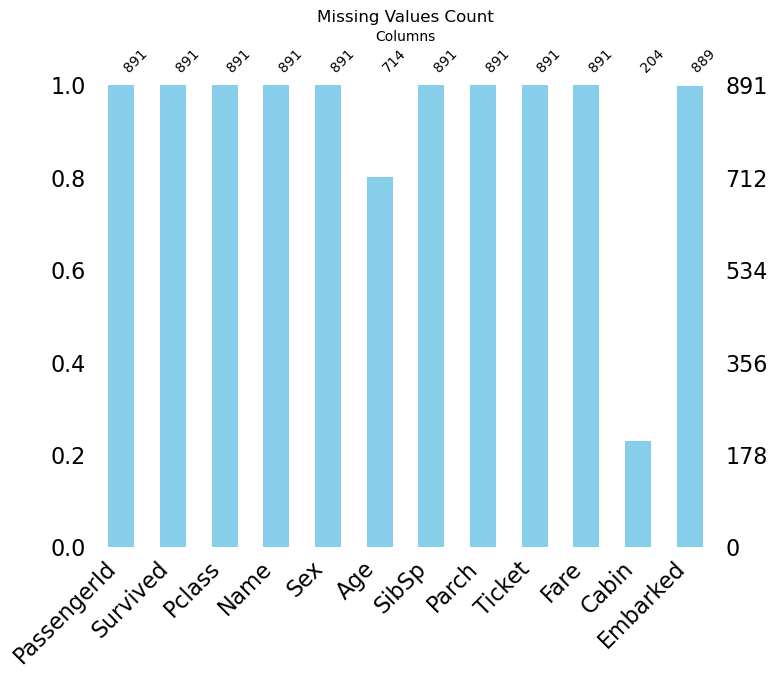


Training Data Duplicates:
No duplicate rows found.

Training Data Unique Values:
PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64
Null Value Counts:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
# Data Overview for training data
print("Training Data Info:")

train_overview.show_info()

print("\nTraining Data Head:")

print(train_overview.show_head())

print("\nTraining Data Tail:")

print(train_overview.show_tail())

print("\nTraining Data Description:")

print(train_overview.show_description())

print("\nTraining Data Missing Values:")

train_overview.show_missing_values()

print("\nTraining Data Duplicates:")

duplicates = train_overview.show_duplicates()

if duplicates is not None:
    print(duplicates)

print("\nTraining Data Unique Values:")

print(train_overview.show_unique_values())

print("Null Value Counts:")

print(train_overview.show_null_values())


#### __3.2.2 Test Data__

In [11]:
# Initialize DataOverview for the test data
test_overview = titanic_survival_project_classes.DataOverview(test_file_path)


Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB

Test Data Head:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          8

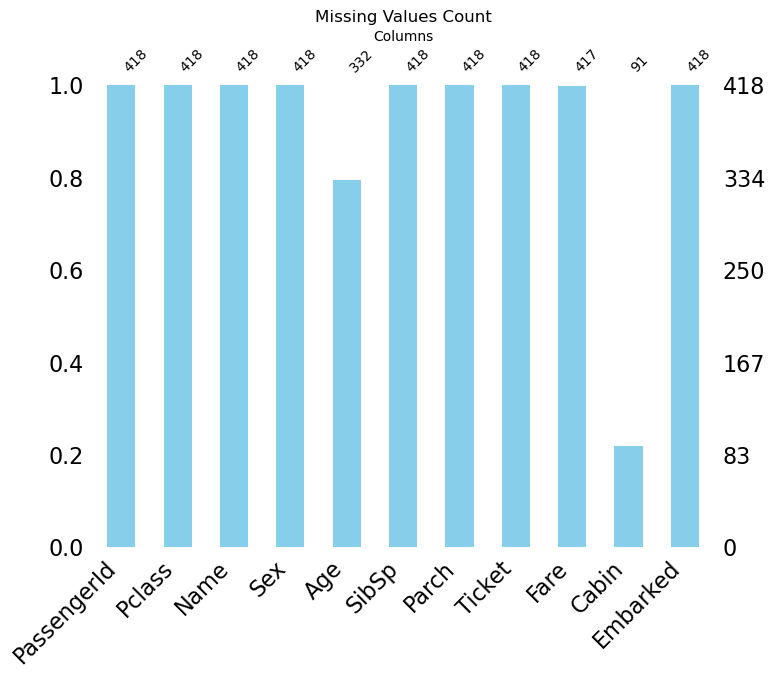


Test Data Duplicates:
No duplicate rows found.

Test Data Unique Values:
PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64
Null Value Counts:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [12]:
# Data Overview for test data
print("\nTest Data Info:")

test_overview.show_info()

print("\nTest Data Head:")

print(test_overview.show_head())

print("\nTest Data Tail:")

print(test_overview.show_tail())

print("\nTest Data Description:")

print(test_overview.show_description())

print("\nTest Data Missing Values:")

test_overview.show_missing_values()

print("\nTest Data Duplicates:")

duplicates = test_overview.show_duplicates()

if duplicates is not None:
    print(duplicates)

print("\nTest Data Unique Values:")

print(test_overview.show_unique_values())

print("Null Value Counts:")

print(test_overview.show_null_values())

### __3.3 Data Cleaning__

### __3.4 Feature Engineering__

## __4.0 Exploratory Data Analysis__

### __4.1 Univariate Analysis__

### __4.2 Bivariate Analysis__

### __4.3 Multivariate Analysis__

## __5.0 Modeling__ 

### __5.1 Data Preprocessing__

#### __5.1.1 Encoding__

#### __5.1.2 Feature Selection__

##### __5.1.2.1 Correlation analysis__

##### __5.1.2.2 Variance Inflation Factor (VIF)__

#### __5.1.3 Log Transformation__

#### __5.1.4 Scaling__

## __6.0 Evaluation__

## __7.0 Deployment__

## __8.0 Conclusion__

## __9.0 Recommendation__